### Importing Libraries

In [34]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Feature description:

**price** price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

**carat** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut** (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color**, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity** (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

*x* length in mm (0--10.74)

*y* width in mm (0--58.9)

*z* depth in mm (0--31.8)

*depth* total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

*table* width of top of diamond relative to widest point (43--95)

In [4]:
data = pd.read_csv("../input/diamonds/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Preprocessing

- Data cleaning
- Identifying and removing outliers
- Encoding categorical variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data.shape

(53940, 10)

In [6]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Drop 2-dimensional diamonds, one of x, y, z contains 0

In [9]:
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)
data.shape

(53920, 10)

Pariplot data

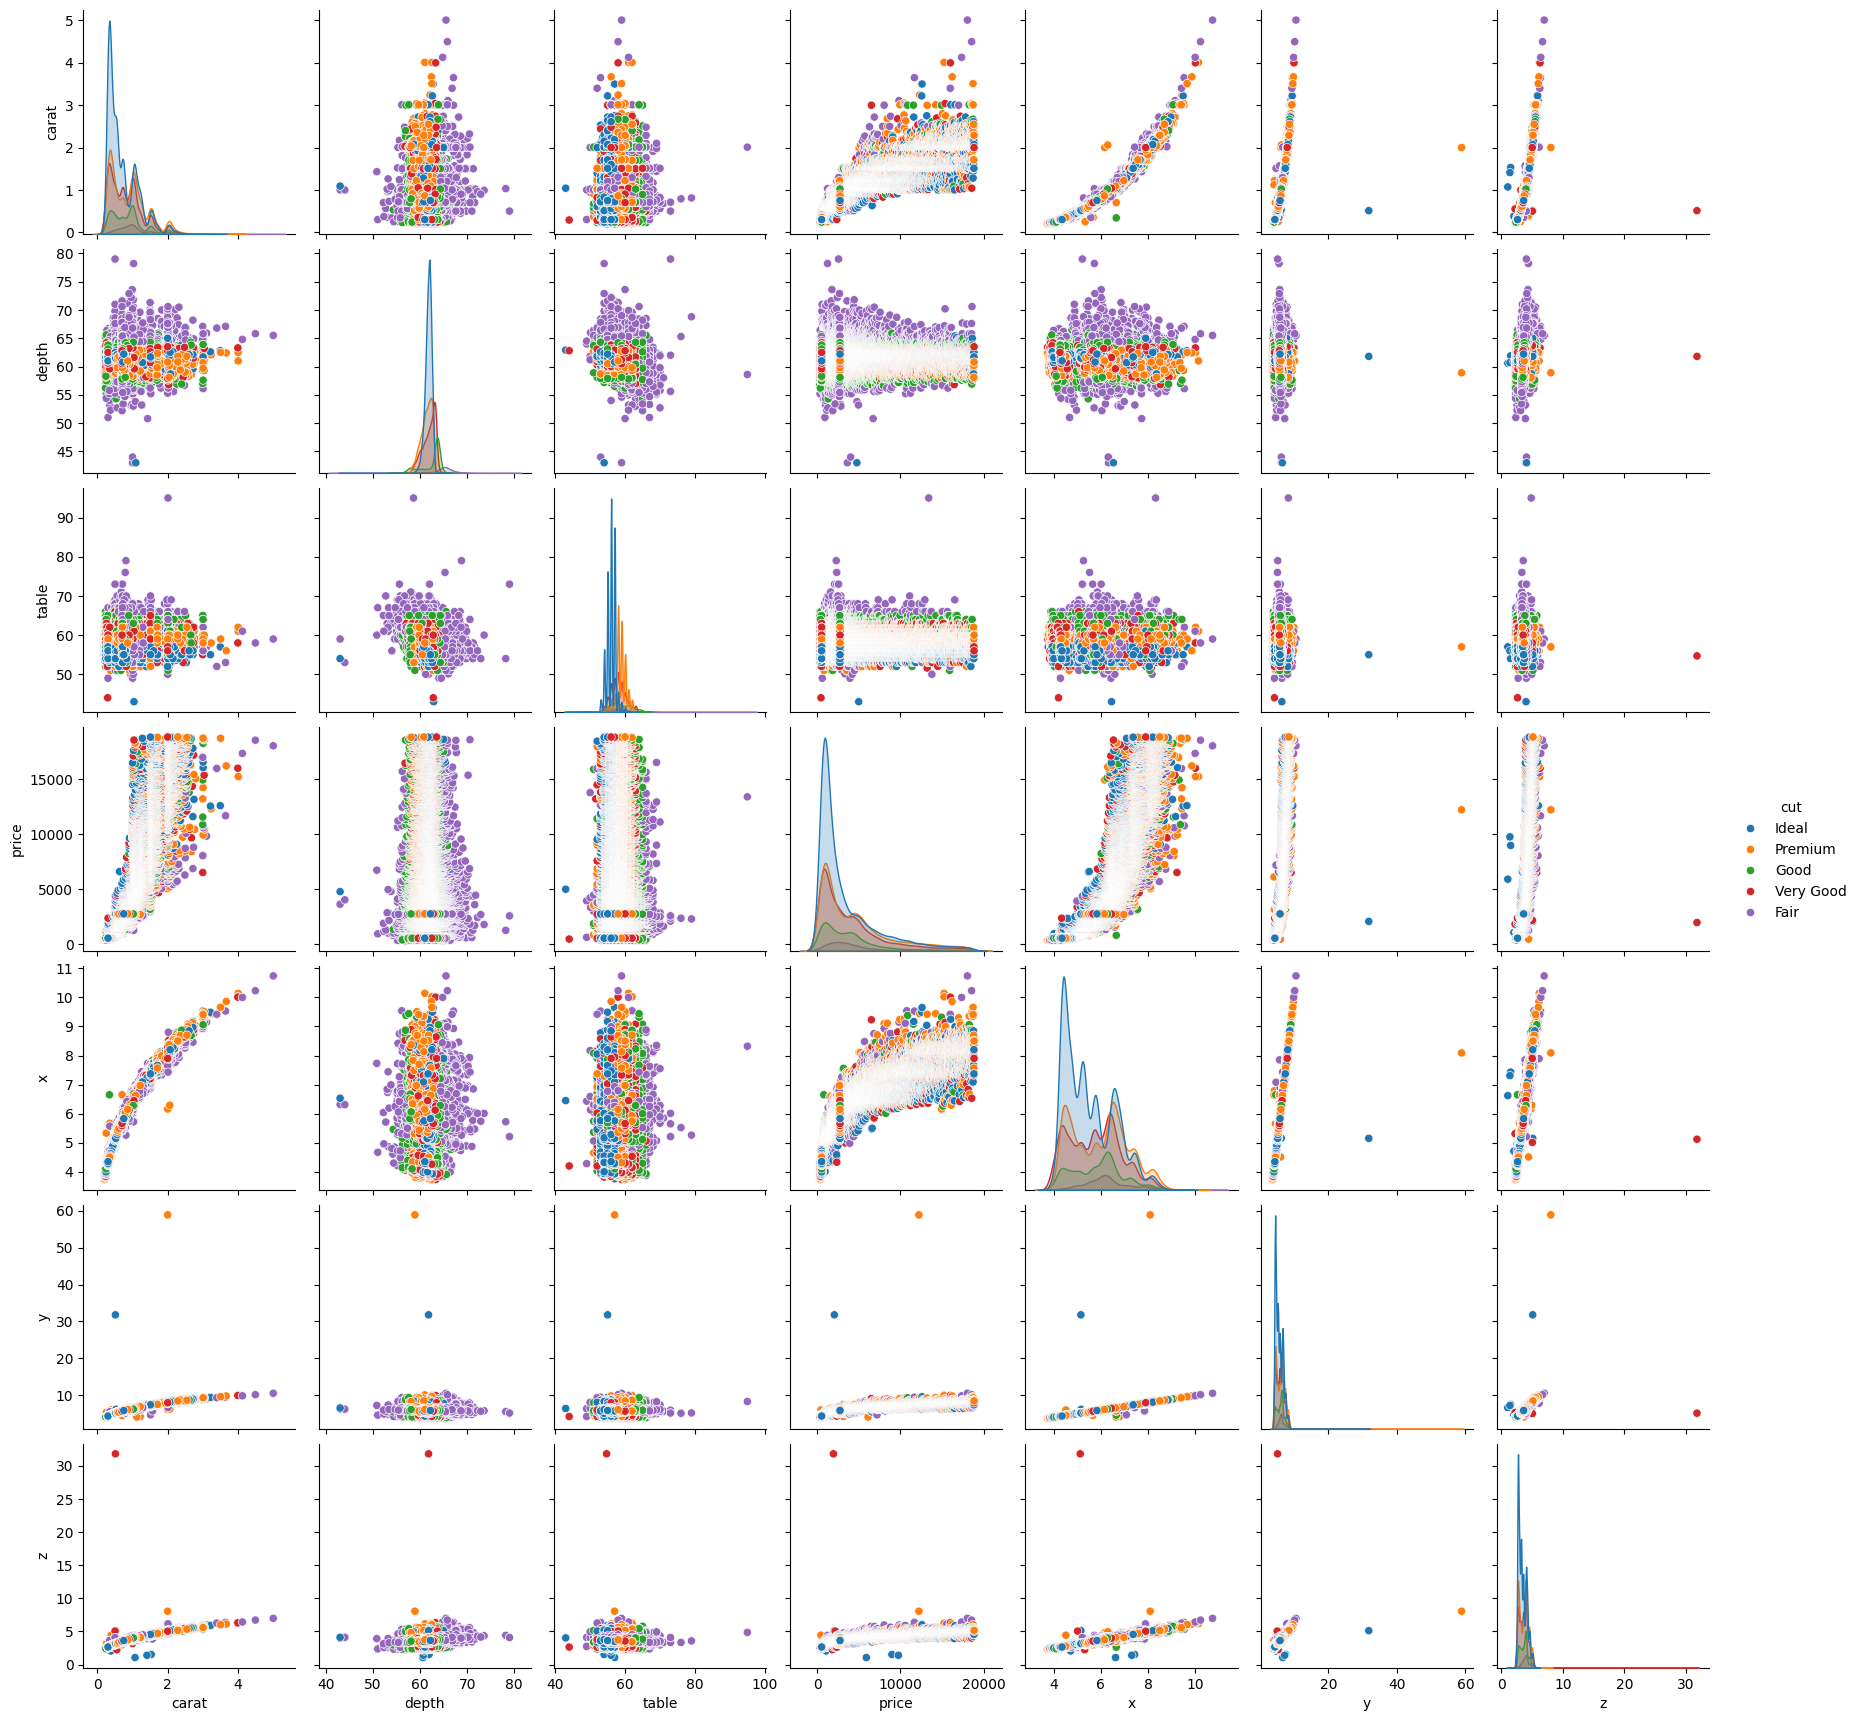

In [11]:
ax = sns.pairplot(data, hue= "cut")

Drop outlies

In [12]:
data = data[(data["depth"] < 75) & (data["depth"] > 45)]
data = data[(data["table"]< 80) & (data["table"] > 40)]
data = data[(data["x"] < 30)]
data = data[(data["y"] < 30)]
data = data[(data["z"] < 30) & (data["z"] > 2)]
data.shape

(53907, 10)

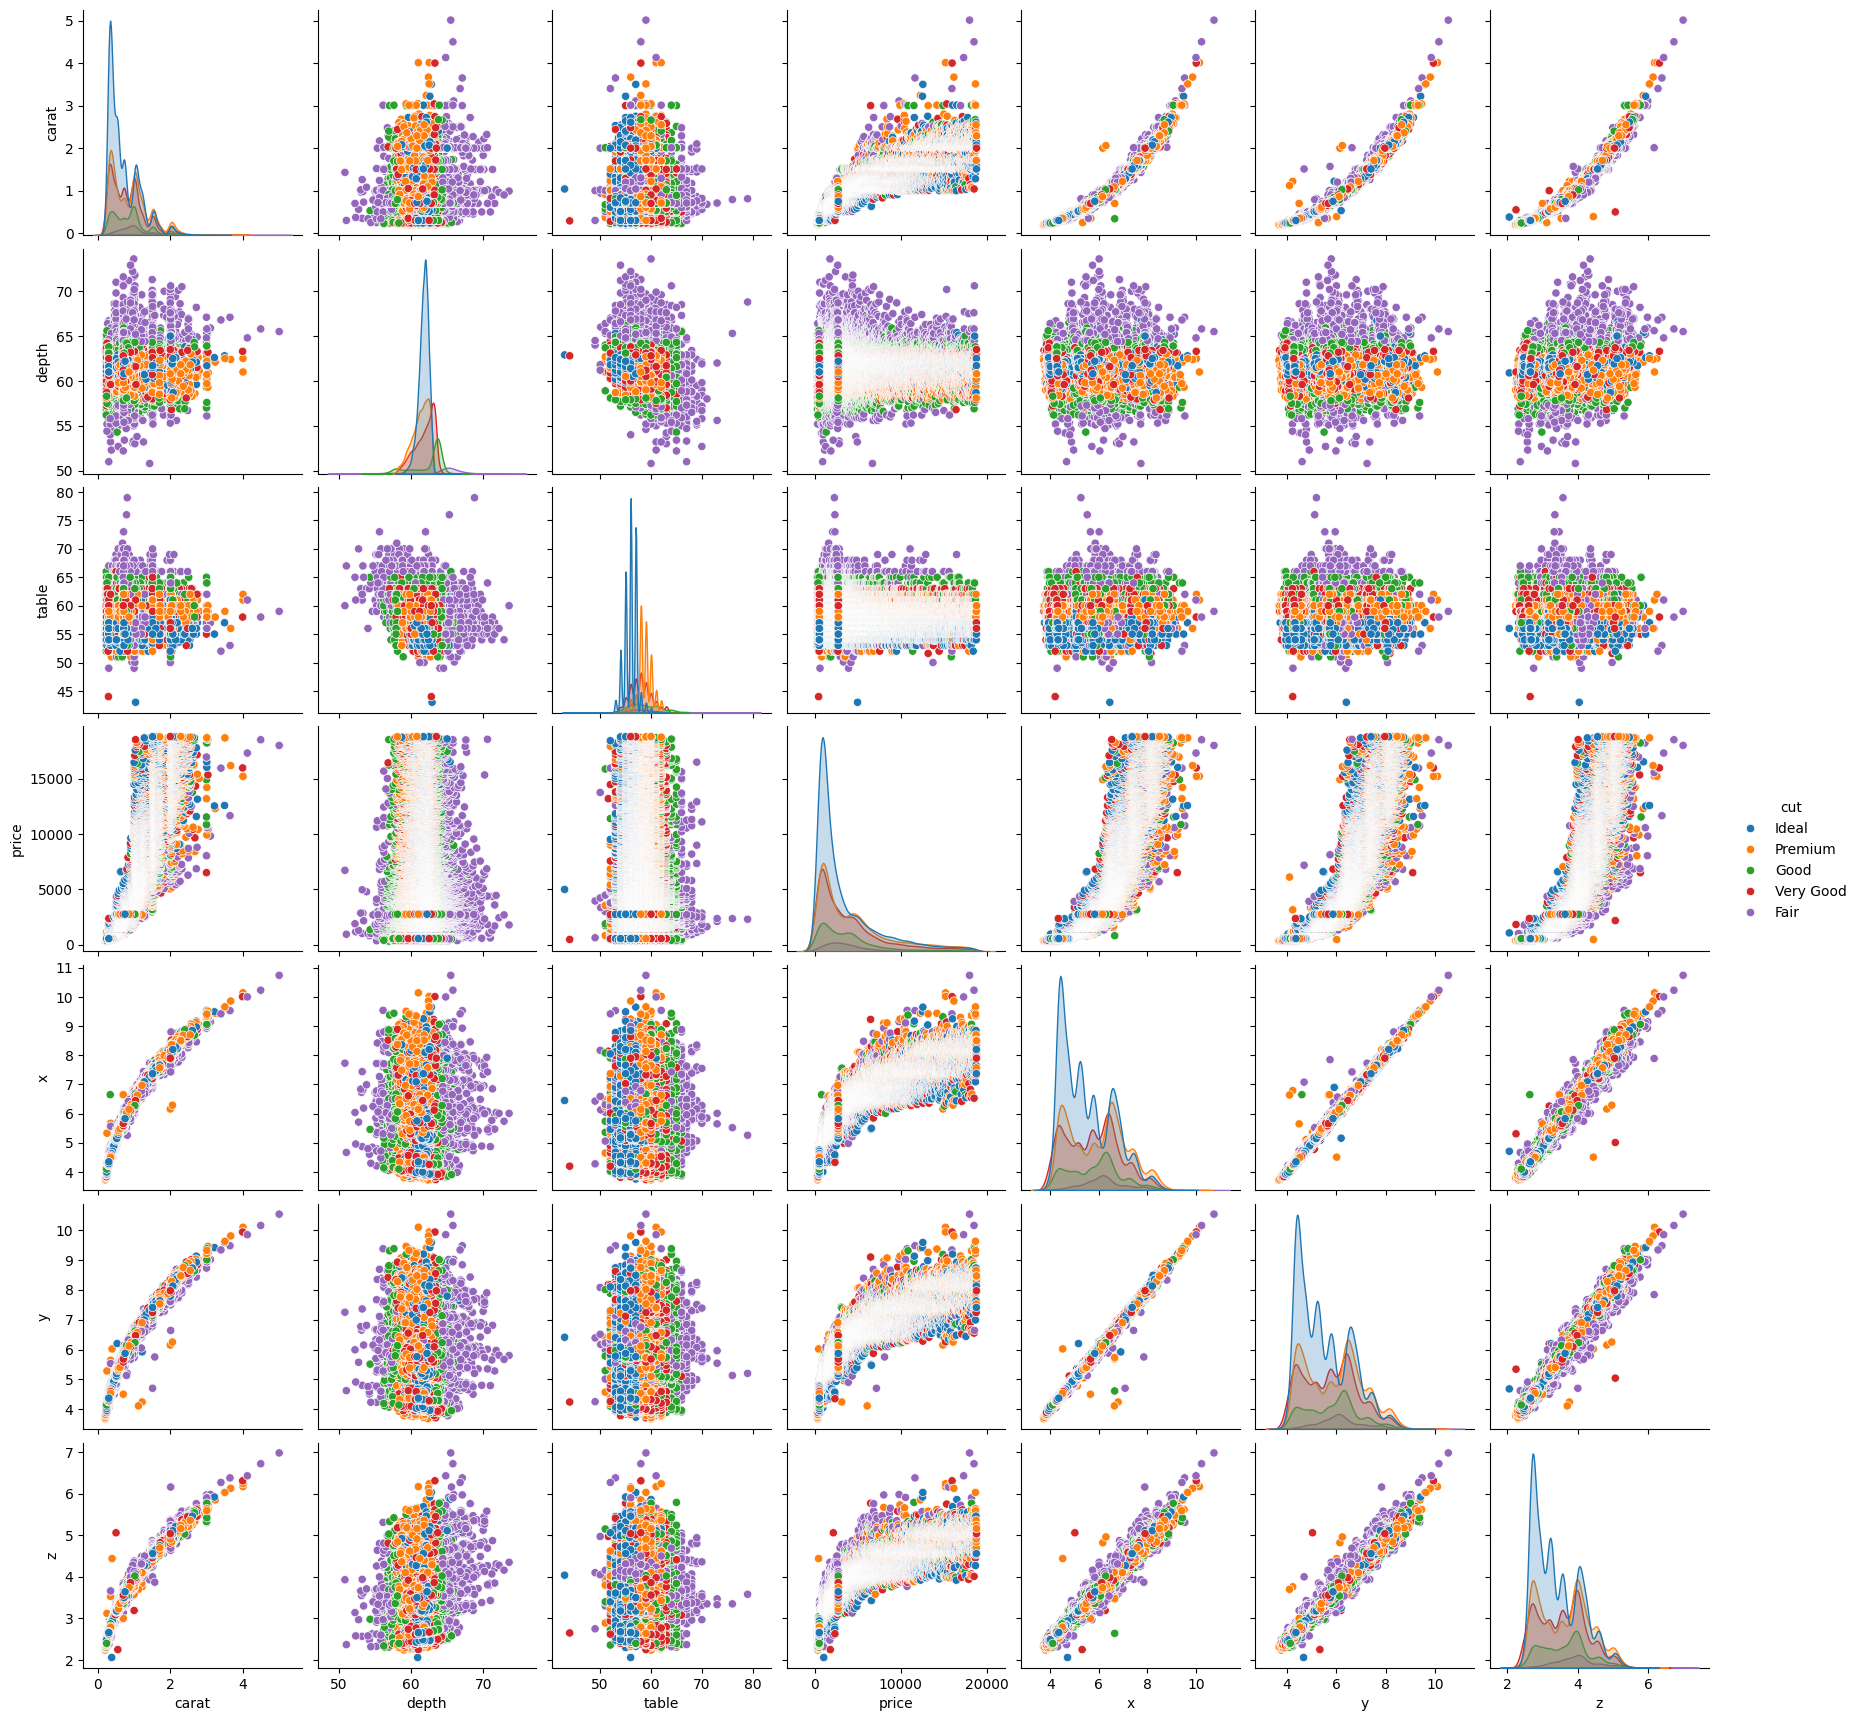

In [13]:
ax = sns.pairplot(data, hue= "cut")

Get list of categorical values

In [14]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print(f"Categorical variables: {object_cols}")

Categorical variables: ['cut', 'color', 'clarity']


/var/folders/0g/g73_ps5s2zz97x4_rd90l7gr0000gn/T/ipykernel_44692/2210894081.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x = "cut", y = "price", data = data, scale = "count")


Text(0.5, 1.0, 'Cut vs Price')

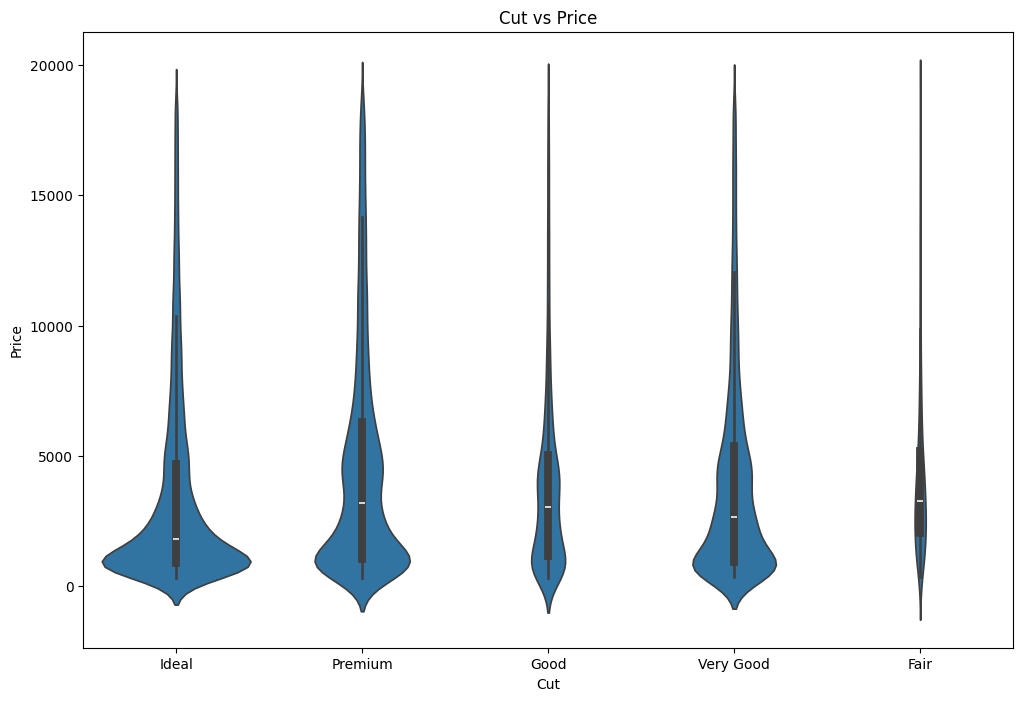

In [16]:
plt.figure(figsize = (12,8))
ax = sns.violinplot(x = "cut", y = "price", data = data, scale = "count")

ax.set_ylabel("Price")
ax.set_xlabel("Cut")
ax.set_title("Cut vs Price")

/var/folders/0g/g73_ps5s2zz97x4_rd90l7gr0000gn/T/ipykernel_44692/3977883668.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x = "color", y = "price", data = data, scale = "count")


Text(0.5, 1.0, 'Color vs Price')

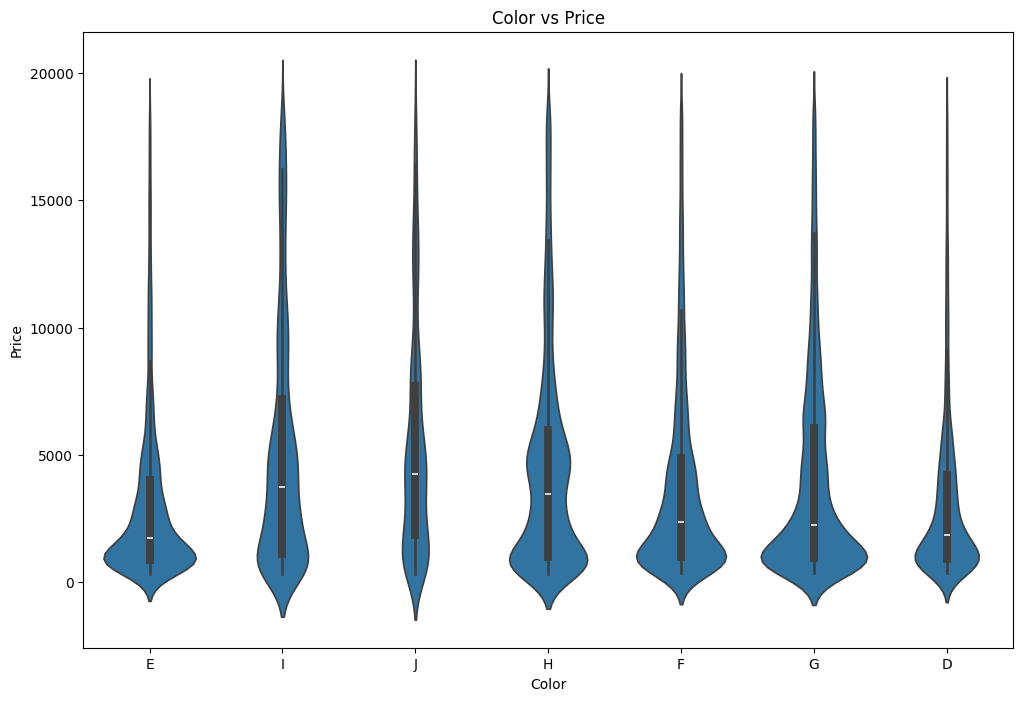

In [19]:
plt.figure(figsize = (12,8))
ax = sns.violinplot(x = "color", y = "price", data = data, scale = "count")

ax.set_ylabel("Price")
ax.set_xlabel("Color")
ax.set_title("Color vs Price")

/var/folders/0g/g73_ps5s2zz97x4_rd90l7gr0000gn/T/ipykernel_44692/1861516772.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x = "clarity", y = "price", data = data, scale = "count")


Text(0.5, 1.0, 'Clarity vs Price')

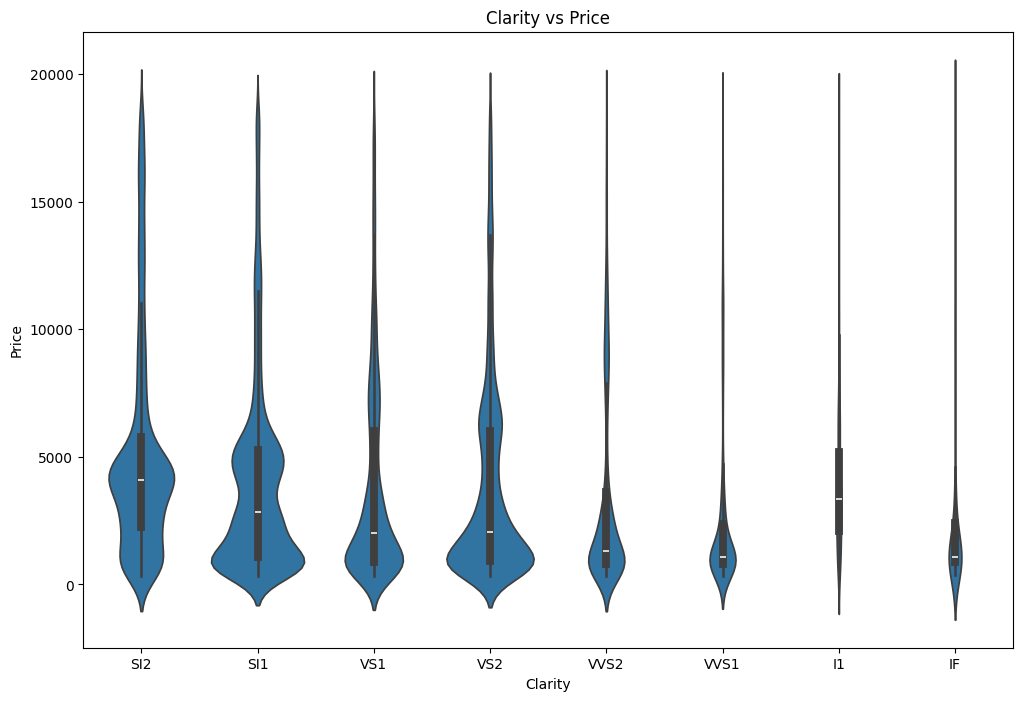

In [21]:
plt.figure(figsize = (12,8))
ax = sns.violinplot(x = "clarity", y = "price", data = data, scale = "count")

ax.set_ylabel("Price")
ax.set_xlabel("Clarity")
ax.set_title("Clarity vs Price")

Apply label encoder columns with categorical data

In [24]:
label_data = data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Correlation matrix

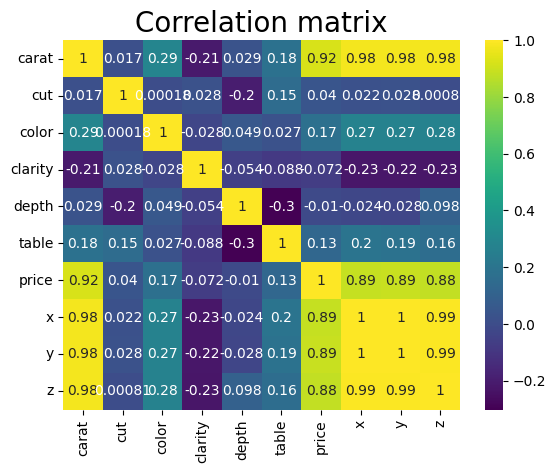

In [33]:

sns.heatmap(label_data.corr(),  cmap='viridis', annot=True)
plt.title("Correlation matrix", size = 20)
plt.show()

Results:

- *x*, *y*, *z* has highest correlation to the target colum
- *depth*, *cut*, *table* show low correlation